In [90]:
import pandas as pd
import random
import numpy as np

In [85]:
data = []

for _ in range(500):
    team_name = f"Team {chr(random.randint(65, 90))}"
    season = random.randint(2010, 2023)
    wins = random.randint(50, 110)
    losses = 162 - wins
    hits = random.randint(1200, 1600)
    doubles = random.randint(200, 350)
    triples = random.randint(10, 40)
    home_runs = random.randint(100, 250)
    strikeouts = random.randint(1000, 1500)

    hits_adjusted = hits + (wins - 80) * 5
    doubles_adjusted = doubles + (wins - 80) * 2
    triples_adjusted = triples + (wins - 8)
    home_runs_adjusted = home_runs + (wins - 80) * 3
    strikeouts_adjusted = strikeouts - (wins - 80) * 10

    data.append([team_name, season, wins, losses, hits_adjusted, doubles_adjusted, triples_adjusted, home_runs_adjusted, strikeouts_adjusted])


In [87]:
columns = ["Team", "Season", "Wins", "Losses", "Hits", "Doubles", "Triples", "HomeRuns", "StrikeOuts"]

In [88]:
df = pd.DataFrame(data, columns=columns)

In [89]:
df.head()

,Team,Season,Wins,Losses,Hits,Doubles,Triples,HomeRuns,StrikeOuts
0,Team S,2018,81,81,1503,275,83,107,1168
1,Team Y,2016,104,58,1662,290,114,285,1030
2,Team K,2023,57,105,1256,203,65,127,1331
3,Team O,2018,88,74,1578,335,100,218,1406
4,Team R,2013,50,112,1262,164,53,63,1432


In [91]:
df.shape

(500, 9)

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

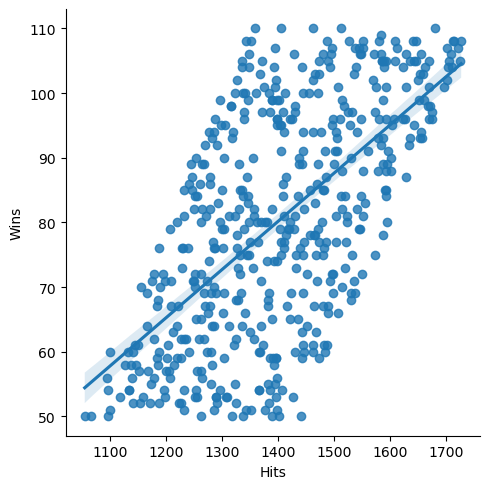

In [93]:
sns.lmplot(x='Hits', y='Wins', data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

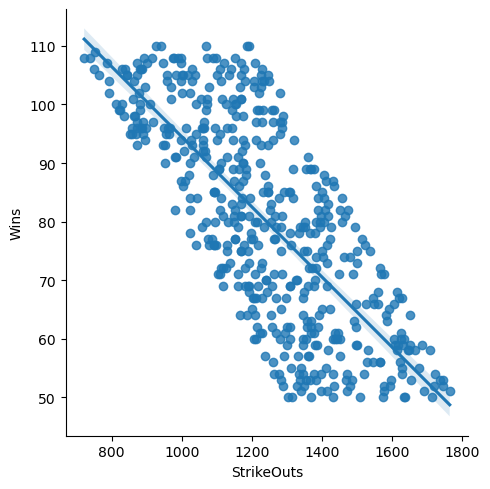

In [96]:
sns.lmplot(x='StrikeOuts', y='Wins', data=df)
plt.show

In [97]:
df2 = df.drop(columns= ['Team', 'Season', 'Losses'], axis=1)

In [98]:
df2.head()

,Wins,Hits,Doubles,Triples,HomeRuns,StrikeOuts
0,81,1503,275,83,107,1168
1,104,1662,290,114,285,1030
2,57,1256,203,65,127,1331
3,88,1578,335,100,218,1406
4,50,1262,164,53,63,1432


In [99]:
X = df[['Hits', 'Doubles', 'Triples', 'HomeRuns', 'StrikeOuts']]
y = df['Wins']

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [104]:
lr = LinearRegression()

In [105]:
lr.fit(X_train, y_train)

LinearRegression()

In [106]:
lr.score(X_train, y_train)

0.8926901739958751

In [110]:
y_pred = lr.predict(X_test)

In [111]:
mean_absolute_error(y_test, y_pred)

4.629114131566582

In [112]:
mean_squared_error(y_test, y_pred)

33.18643893137295

In [113]:
r2_score(y_test, y_pred)

0.8903385860210049

In [114]:
lr.coef_

array([ 0.01602538,  0.02944401,  0.42495067,  0.06291033, -0.0159384 ])

In [115]:
lr.intercept_

16.840774996442335